## 1- Sistema estimador de potencia instantanea
Calcula punto a punto la potencia instantánea de la señal
$$y[n] = (x[n])^2$$

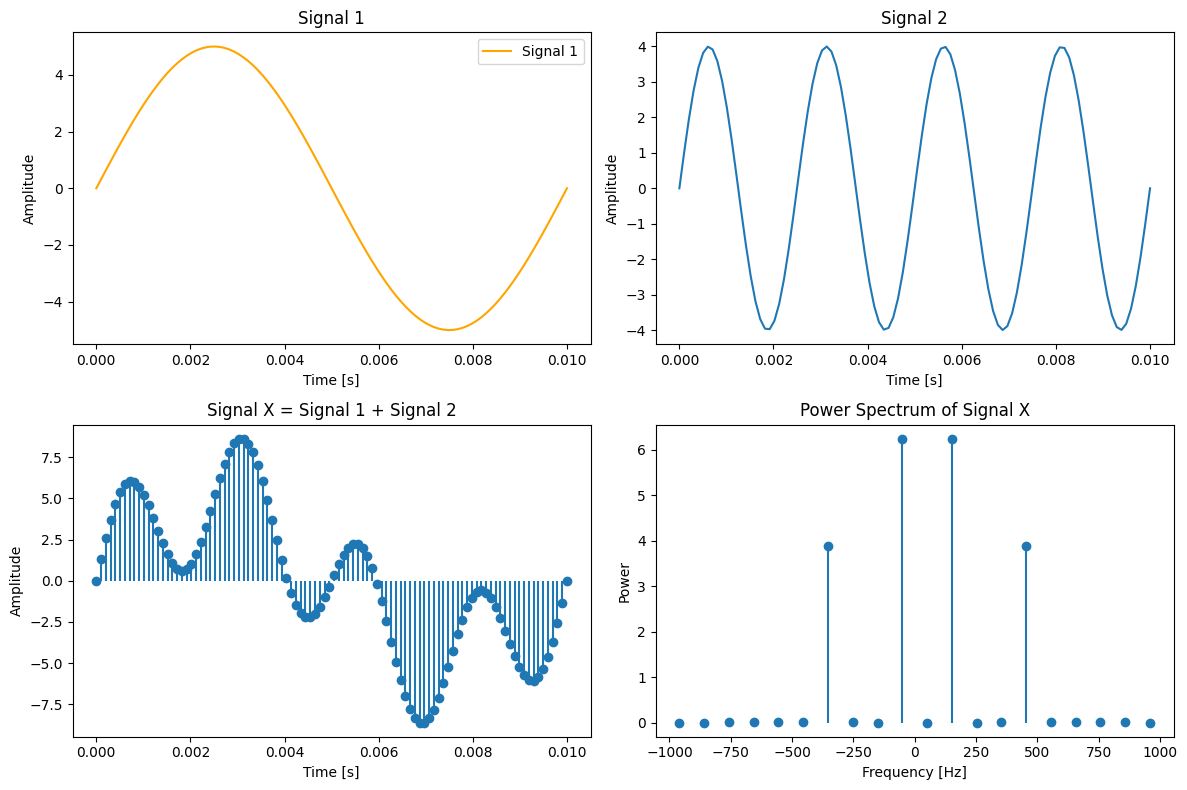

In [9]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

########### Parámetros Iniciales ###########
Fs = 10000  # Frecuencia de muestreo : 10 kHz
N = 100      # Número de muestras
t = np.linspace(0, N/Fs, num=N)  # Crea una variable de tiempo desde 0, con intervalos de 1/Fs
t2 = np.arange(0, N/Fs, 1/Fs)

f1 = 100   # 100Hz
A1 = 5
signal_1 = A1 * np.sin(2*np.pi*f1*t)
signal_1_alt = A1 * np.sin(2*np.pi*f1*t2)

f2 = 400  # 400Hz
A2 = 4
signal_2 = A2 * np.sin(2*np.pi*f2*t)

signal_x = signal_1 + signal_2

spec_sig_x = abs(np.fft.fftshift(fft(signal_x))) / N
spec_pw_x = np.power(np.abs(spec_sig_x), 2)
f = np.linspace(-Fs/2, Fs/2, N)

########### Gráficos ###########
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Signal 1
axs[0, 0].plot(t, signal_1, label="Signal 1",color='orange')
#axs[0, 0].plot(t2, signal_1_alt, linestyle='--', label="Signal 1 (alt)")
axs[0, 0].set_title("Signal 1")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].legend()

# Signal 2
axs[0, 1].plot(t, signal_2)
axs[0, 1].set_title("Signal 2")
axs[0, 1].set_xlabel("Time [s]")
axs[0, 1].set_ylabel("Amplitude")

# Signal X
axs[1, 0].stem(t, signal_x, basefmt=" ")
axs[1, 0].set_title("Signal X = Signal 1 + Signal 2")
axs[1, 0].set_xlabel("Time [s]")
axs[1, 0].set_ylabel("Amplitude")

# Power Spectrum
axs[1, 1].stem(f[int(N/2)-10:int(N/2)+10], spec_pw_x[int(N/2)-10:int(N/2)+10], basefmt=" ")
axs[1, 1].set_title("Power Spectrum of Signal X")
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].set_ylabel("Power")

# Ajustar los subplots para una mejor visualización
plt.tight_layout()
plt.show()


## 2 - Teorema de convolución

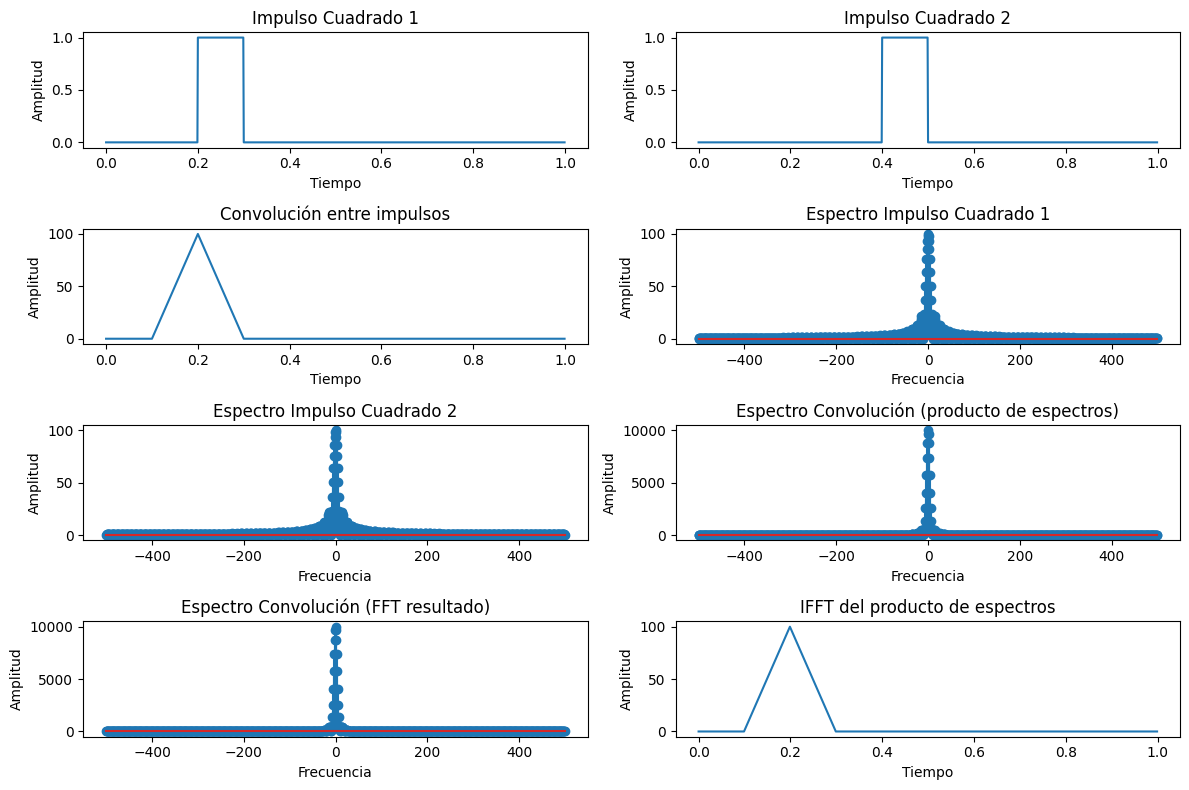

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, fftshift, fftfreq, ifft

# Parámetros de los impulsos cuadrados
t = np.linspace(0, 1, 1000, endpoint=False)  # Vector de tiempo
impulso1 = np.zeros_like(t)
impulso1[200:300] = 1  # Impulso cuadrado 1
impulso2 = np.zeros_like(t)
impulso2[400:500] = 1  # Impulso cuadrado 2

# Realizar la convolución de los impulsos
resultado_conv = np.convolve(impulso1, impulso2, mode='same')

# Calcular los espectros de los impulsos y del resultado de la convolución
espectro_impulso1 = (fft(impulso1))
espectro_impulso2 = (fft(impulso2))
espectro_conv = espectro_impulso1 * espectro_impulso2 #Por teorema de convolución
espectro_conv_fft = fftshift(fft(resultado_conv)) #FFT de la convolución en tiempo

# Graficar en el dominio del tiempo
plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
plt.plot(t, impulso1)
plt.title('Impulso Cuadrado 1')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 2)
plt.plot(t, impulso2)
plt.title('Impulso Cuadrado 2')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 3)
plt.plot(np.arange(len(resultado_conv))/1000, resultado_conv)
plt.title('Convolución entre impulsos')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Graficar en el dominio de la frecuencia
freqs = fftshift(fftfreq(len(t), 1/1000))

plt.subplot(4, 2, 4)
plt.stem(freqs, np.abs(fftshift(espectro_impulso1)))
plt.title('Espectro Impulso Cuadrado 1')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 5)
plt.stem(freqs, np.abs(fftshift(espectro_impulso2)))
plt.title('Espectro Impulso Cuadrado 2')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 6)
plt.stem(freqs, np.abs(fftshift(espectro_conv)))
plt.title('Espectro Convolución (producto de espectros)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(4, 2, 7)
plt.stem(freqs, np.abs((espectro_conv_fft)))
plt.title('Espectro Convolución (FFT resultado)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

senal_reconstruida = ifft(espectro_conv)

# Graficar la señal reconstruida en el dominio del tiempo

#plt.figure(figsize=(6, 4))
plt.subplot(4,2,8)
plt.plot(t, np.abs(fftshift(senal_reconstruida)))
plt.title('IFFT del producto de espectros')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()


## Convolución en imágenes

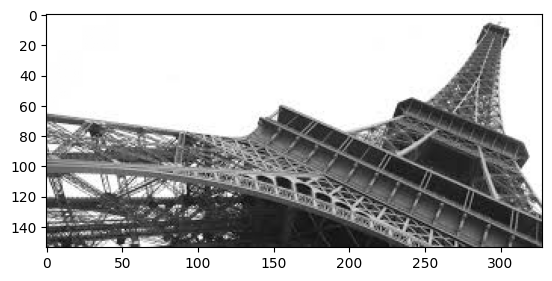

In [11]:
import scipy.signal as sig
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
myPath= ''
#En esa variable usar el path donde tengan los archivos

import cv2
img = plt.imread(myPath+'img/eiffel.png')

plt.imshow(img)

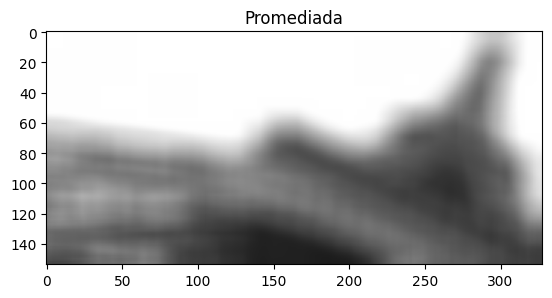

In [12]:
kernel_size = 25
kernel1 = np.ones((kernel_size,kernel_size))
karea= np.power(kernel_size,2)
kernel1.fill(0.04*25/karea)
img_k1 = cv2.filter2D(img,-1,kernel1)

#print (kernel1)
plt.title('Promediada')
plt.imshow(img_k1)

## Convolución de audio

In [13]:
input_rate,input_sig=scipy.io.wavfile.read(myPath+'audio_samples/JoeBonamassa.wav')
IR_rate,IR_sig=scipy.io.wavfile.read(myPath+'audio_samples/1a_marble_hall.wav')

rate=input_rate
con_len=-1
out_0=sig.fftconvolve(input_sig[:con_len,0],IR_sig[:con_len,0])
out_0=out_0/np.max(np.abs(out_0))
scipy.io.wavfile.write(myPath+'audio_samples/Result_1a_marble_hall.wav', rate ,out_0)
print ("done")

done


C:\Users\marti\AppData\Local\Temp\ipykernel_18688\942675198.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  input_rate,input_sig=scipy.io.wavfile.read(myPath+'audio_samples/JoeBonamassa.wav')
